In [21]:
# import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Detect if mean or var shifts for continous stream data
Use Hawkins CUSUM Method described in http://rmgsc.cr.usgs.gov/outgoing/threshold_articles/Hawkins_Zamba2005b.pdf
Tunable Parameters:
 k : Allowance value, a threshold that signals a possible shift starts at the current position
 H : If CUSUM value goes beyond this value, conclude a shift has occured and the shift starts at the last point whose CUSUM is   larger than k Allowance value

In [202]:
#### Function to get the mean and std of the first 50 data points
#### Use Hawkins CUSUM Method described in http://rmgsc.cr.usgs.gov/outgoing/threshold_articles/Hawkins_Zamba2005b.pdf
#### and in Douglas C. Montgomery Statistical Quality Control 6th Edition Page 400-Page 417 Chapter Time-Weighted Control Charts
#### Tunable Parameters:
#### k : Allowance value, a threshold that signals a possible shift starts at the current position
#### H : If CUSUM value goes beyond this value, conclude a shift has occured and the shift starts at the last point
####  whose CUSUM is larger than k Allowance value
#### Seperate k and H values are used for mean and var shift detection
#### Usage example: data = np.loadtxt("posShiftUpVar_70.txt", delimiter=",") shiftDetect(data)

def shiftDetect(data):
    
    cusums_mean_up = []   # Ci array for mean upper shift detection
    N_mean_up = [] # N+ array for mean upper shift detection
    n_mean_up = 0 # N1 = 0
    cusum_mean_up = 0   # C1 = 0 for mean upper shift detection
    cusums_mean_lo = []   # Ci array for mean lower shift detection
    N_mean_lo = [] # N+ array for mean lower shift detection
    n_mean_lo = 0 # N1 = 0
    cusum_mean_lo = 0   # C1 = 0 for mean lower shift detection
    
    cusums_var_up = [] # Ci array for var upper shift detection
    N_var_up = [] # N+ arrary for var upper shift detection
    n_var_up = 0 # N1 = 0
    cusum_var_up = 0 # C1 = 0 for var upper shift detection
    cusums_var_lo = [] # Ci array for var lower shift detection
    N_var_lo = [] # N+ arrary for var lower shift detection
    n_var_lo = 0 # N1 = 0
    cusum_var_lo = 0 # C1 = 0 for var lower shift detection
    
    n = 50 # The first n samples form the baseline
    i = 1 # The index looping through
    mean = np.mean(data[:n]) # mean of baseline
    sd = np.std(data[:n]) # std of baseline
    k = 2 * sd  # Allowance value for mean shift detection
    H = 12 * sd # Decision interval for mean shift detection
    k_v = 1 * sd # Allowance value for var shift detection
    if mean/sd <= 2:
        H_v = 1.5 * mean/sd * sd # Decision interval for var shift detection that mean and std are close
    else:
        H_v = 5* mean/sd *sd # Decision interval for var shift detection that std is much smaller than mean
    print ("mean of 50 samples = " + str(mean))
    print ("std of 50 samples = " + str(sd))
    print ("Allowance value of mean = " + str(k))
    print ("Decision interval of mean = " + str(H))
    print ("Allowance value of variance = " + str(k_v))
    print ("Decision interval of variance = " + str(H_v))
    
    plt.plot(data)
    plt.title("All Data Points")
    plt.show()
    
    #for x in data[n+1:]: # Start building CUSUM tabular from the n+1 point
    for x in data: # Start building CUSUM tabular 
        
        ## Tabular CUSUM for mean shift detection
        # mean upper shift CUSUM tabular generation
        cusum_mean_up = max(0, x - (mean + k) + cusum_mean_up) # Ci = max(0, xi-(mean+k)+Ci-1) for mean shift detection
        
        if cusum_mean_up == 0: # if cusum value is 0 
             n_mean_up = 0    # not start recording a possible shift change, set index Number to 0
        else:
             n_mean_up = n_mean_up + 1 # else if cusum value is not 0 
        N_mean_up.append(n_mean_up) # start recording a possible shift change, increment index Number by 1
            
        cusums_mean_up.append(cusum_mean_up) # Append CUSUM
        
        # mean lower shift CUSUM tabular generation
        cusum_mean_lo = max(0, (mean - k) - x + cusum_mean_lo) # Ci = max(0, (mean-k)-xi+Ci-1) for mean shift detection
        
        if cusum_mean_lo == 0: # if cusum value is 0 
             n_mean_lo = 0     # not start recording a possible shift change, set index Number to 0
        else:
             n_mean_lo = n_mean_lo + 1 # else if cusum value is not 0 
        N_mean_lo.append(n_mean_lo)   # start recording a possible shift change, increment index Number by 1
             
        cusums_mean_lo.append(cusum_mean_lo) # Append CUSUM 
        
        ## Tabular CUSUM for var shift detection
        ## Ci  for var shift detection,Hawkins metod: yi = (xi - mean)/std, vi = (sqrt(abs(yi)) - 0.822)/0.349
        ## Si+ = max(0,vi-k+Si-1) , Si- = max(0,-k-vi+Si-1)
        
        # var upper shift CUSUM tabular generation
        y = (x - mean)/sd
        if mean/sd <= 2:
           v = ((np.sqrt(abs(y))) - 0.822) / 0.01 # v for mean and std are very close like posVarup 60 file
        else:
           v = ((np.sqrt(abs(y))) - 0.822) / 0.03  #file for std is much smaller than mean like posVarup70 file
        
        cusum_var_up = max(0, v - k_v + cusum_var_up)
        
        if cusum_var_up == 0: # if cusum value is 0 
             n_var_up = 0     # not start recording a possible shift change, set index Number to 0
        else:
             n_var_up = n_var_up + 1 # else if cusum value is not 0 
        N_var_up.append(n_var_up)   # start recording a possible shift change, increment index Number by 1
        
        cusums_var_up.append(cusum_var_up) # Append CUSUM 
        
        # var lower shift CUSUM tabular generation
        # cusum_var_lo = max(0,-v - k_v + cusum_var_up)
        cusum_var_lo = abs(-v - k_v + cusum_var_up)
        
        if cusum_var_lo == 0: # if cusum value is 0 
             n_var_lo = 0     # not start recording a possible shift change, set index Number to 0
        else:
             n_var_lo = n_var_lo + 1 # else if cusum value is not 0 
        N_var_lo.append(n_var_lo)   # start recording a possible shift change, increment index Number by 1
        
        cusums_var_lo.append(cusum_var_lo) # Append CUSUM 
        
        
        i = i + 1
        ## Decide if shift in mean or var is detected
        if cusum_mean_up > H:
           
            c_i = i - (n_mean_up - 1) # The position where change right starts
            print("Mean shifted up at position " + str(c_i))
            
            print("CUSUM = " + str(cusums_mean_up))
            plt.plot(cusums_mean_up)
            plt.title("CUSUM of MEAN UP " + str(c_i) + " observations")
            plt.show()
            return
        
        if cusum_mean_lo > H:
            
            c_i = i - (n_mean_lo - 1) # The position where change right starts
            print("Mean shifted down at position " + str(c_i))
            print("CUSUM = " + str(cusums_mean_lo))
            plt.plot(cusums_mean_lo)
            plt.title("CUSUM of MEAN DOWN" + str(c_i) + " observations")
            plt.show()
            return
        
        
        if cusum_var_up > H_v:
            #c_i = i + n + 1 - (n_var_up - 1) # The position where change right starts
            c_i = i  - (n_var_up - 1)
            print("Variance shifted up at position " + str(c_i))
            print("CUSUM = " + str(cusums_var_up))
            plt.plot(cusums_var_up)
            plt.title("CUSUM of VAR up" + str(c_i) + " observations")
            plt.show()
            return
        
        if cusum_var_lo > H_v:
            #c_i = i + n + 1 - (n_var_lo - 1) # The position where change right starts
            c_i = i  - (n_var_lo - 1)
            print("Variance shifted down at position " + str(c_i))
            print("CUSUM = " + str(cusums_var_lo))
            plt.plot(cusums_var_lo)
            plt.title("CUSUM of VAR down" + str(c_i) + " observations")
            plt.show()
            return
        
       
    print("No Change")
    
    print("CUSUM = " + str(cusums_mean_up))
    plt.plot(cusums_mean_up)
    plt.title("CUSUM of mean up")
    plt.show()
    
    print("CUSUM = " + str(cusums_mean_lo))
    plt.plot(cusums_mean_lo)
    plt.title("CUSUM of mean down")
    plt.show()
    
    print("CUSUM = " + str(cusums_var_up))
    plt.plot(cusums_var_lo)
    plt.title("CUSUM of VAR up")
    plt.show()
    
    print("CUSUM = " + str(cusums_var_lo))
    plt.plot(cusums_var_lo)
    plt.title("CUSUM of VAR down")
    plt.show()
    #plt.plot(all_cusums)
    #plt.title("CUSUM of " + str(n) + " observations")
    #plt.show()
    return



mean of 50 samples = 79.06282
std of 50 samples = 6.85063004019
Allowance value of mean = 13.7012600804
Decision interval of mean = 82.2075604823
Allowance value of variance = 6.85063004019
Decision interval of variance = 395.3141


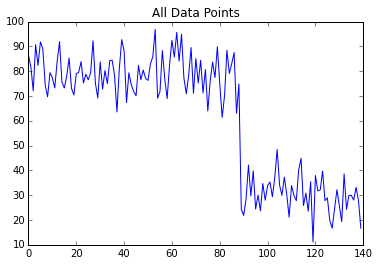

Mean shifted down at position 91
CUSUM = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.7965599196132302, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.398559919613227, 0, 0, 0, 0, 0, 3.9635599196132247, 0, 0, 0, 0, 0, 2.3245599196132289, 0, 40.995559919613228, 84.502119839226452]


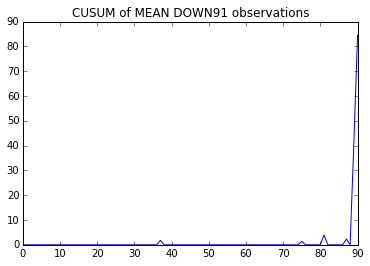

In [203]:
## Test with posShiftUpVar_70.txt
data = np.loadtxt("posShiftUpVar_70.txt", delimiter=",")


shiftDetect(data)
